# 목표

코스피, 나스닥, S&P500에 자산배분했을 때 동일가중, 최고샤프비율, 최소분산 포트폴리오들의 성과를 분석.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cvxpy as cvx

In [2]:
ksp = pd.read_csv("kospi.csv", index_col=0, parse_dates=True, thousands=",")

ksp.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,3195.669922,3215.129883,3030.600098,3068.820068,3068.820068,14249700
2021-10-01,3056.209961,3062.600098,2901.510010,2970.679932,2970.679932,13901200
2021-11-01,2984.179932,3034.300049,2822.729980,2839.010010,2839.010010,13771400
2021-12-01,2860.120117,2975.439941,2837.030029,2968.330078,2968.330078,1582900
2021-12-06,2954.820068,2977.659912,2932.489990,2969.300049,2969.300049,334475


In [3]:
nd=pd.read_csv("nasdaq.csv",index_col=0,parse_dates=True, thousands=",");nd.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,15637.129883,15701.400391,14684.549805,14689.620117,14689.620117,94713820000
2021-10-01,14731.379883,15856.900391,14384.929688,15850.469727,15850.469727,98654030000
2021-11-01,15879.610352,16764.859375,15785.309570,16135.919922,16135.919922,108529440000
2021-12-01,16347.959961,16427.189453,15543.309570,15712.040039,15712.040039,17515640000
2021-12-03,16039.407227,16089.613281,15543.305664,15712.041016,15712.041016,1007531


In [4]:
sp=pd.read_csv("sp500.csv",index_col=0,parse_dates=True, thousands=",");sp.tail()

,Open,High,Low,Close*,Adj Close,Volume
Date,,,,,,
1996-02-15,655.58,656.84,651.15,651.32,651.32,415320000
1996-02-14,660.51,661.53,654.36,655.58,655.58,421790000
1996-02-13,661.45,664.23,657.92,660.51,660.51,441540000
1996-02-12,656.37,662.95,656.34,661.45,661.45,397890000
1996-02-09,656.07,661.08,653.64,656.37,656.37,477640000


In [5]:
pRf = 0.38 / 100 
rf = 0.17 / 100 

trainStart = "1997-01-01"
trainEnd = "2010-12-31"
testStart = "2011-01-01"
testEnd = "2021-12-31"


In [6]:
from datetime import timedelta

reDf = {}

reDf["ksp"] = ksp[trainStart:trainEnd].loc[:, "Adj Close"].pct_change().dropna()
reDf["nasdaq"] = nd[trainStart:trainEnd].loc[:, "Adj Close"].pct_change().dropna()

commonInd = nd[trainStart:trainEnd].index

sp = sp.sort_index()

newSp = pd.DataFrame()

n = 0

while True:

  if n >= sp.shape[0]:

    break

  ind = sp.index[n]


  if ind in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])


      n += 10



  elif ind - timedelta(days=1)  in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])

      n +=10

  elif ind - timedelta(days=2)  in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])

      n += 10


  elif ind - timedelta(days=3)  in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])

      n += 10


  elif ind - timedelta(days=4)  in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])

      n += 10


  elif ind - timedelta(days=5)  in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])

      n += 10



  else:

    n += 1

print(newSp, reDf["nasdaq"])


print(newSp)

#assert newSp.shape[0] == reDf["nasdaq"].shape[0]

sp = newSp.sort_index()

sqS = sp[trainStart:testStart].loc[:, "Adj Close"].pct_change().dropna()

sqS.index = reDf["nasdaq"].index


reDf["sp500"] = sqS

reDf = pd.DataFrame(reDf)

reDf.head()

               Open     High      Low   Close*  Adj Close      Volume
Date                                                                 
1997-01-02   740.74   742.81   729.55   737.01     737.01   463230000
1997-02-03   786.16   787.14   783.12   786.73     786.73   463600000
1997-03-03   790.82   795.31   785.66   795.31     795.31   437220000
1997-04-01   757.12   761.49   751.26   759.64     759.64   515770000
1997-05-01   801.34   802.95   793.21   798.53     798.53   460380000
...             ...      ...      ...      ...        ...         ...
2010-08-02  1107.53  1127.30  1107.53  1125.86    1125.86  4144180000
2010-09-01  1049.72  1081.30  1049.72  1080.29    1080.29  4396880000
2010-10-01  1143.49  1150.30  1139.42  1146.24    1146.24  4298910000
2010-11-01  1185.71  1195.81  1177.65  1184.38    1184.38  4129180000
2010-12-01  1186.60  1207.61  1186.60  1206.07    1206.07  4548110000

[168 rows x 6 columns] Date
1997-02-01   -0.077142
1997-03-01   -0.062790
1997-04-01    0

,ksp,nasdaq,sp500
Date,,,
1997-02-01,-0.013575,-0.077142,0.067462
1997-03-01,0.001197,-0.062790,0.010906
1997-04-01,0.038223,0.097458,-0.044850
1997-05-01,0.061331,0.096154,0.051195
1997-06-01,-0.001286,-0.001617,0.059898


In [7]:
means = reDf.mean()
sds = reDf.std()
cov = reDf.cov()

sds

ksp       0.097687
nasdaq    0.086871
sp500     0.051316
dtype: float64

In [ ]:
X= cvx.Variable((3, 1))

constraints = [
               sum(X) == 1.0
]

prob = cvx.Problem(cvx.Minimize(cvx.quad_form(X, cov.values)), constraints)

result = prob.solve()

mvp = X.value
mvp

port = {}
port["최소분산"]= mvp

In [ ]:
ewp = np.array([[1/3], [1/3], [1/3]])

ewp
port["동일가중"]= ewp

In [ ]:
X= cvx.Variable((3, 1))

constraints = [
               sum(X) == 1.0
]

prob = cvx.Problem(cvx.Maximize(((means.values.reshape(1, -1) @ X )- pRf) - 0.5 * cvx.quad_form(X, cov.values)), constraints)

result = prob.solve()

tp = X.value
tp

tm = float(means.values.reshape(1, -1) @ X.value)
ts = np.sqrt(float(X.value.reshape(1, -1) @ cov.values @ X.value.reshape(-1, 1)))

x = (tm - pRf) / ts

port["탄젠트"] = tp

x

0.07959538310373965

In [ ]:
X= cvx.Variable((3, 1))

def utility(mu, var):

  return mu - 0.5 * var

constraints = [
               sum(X) == 1.0
]

prob = cvx.Problem(cvx.Maximize(utility(means.values.reshape(1, -1) @ X, cvx.quad_form(X, cov.values))), constraints)

result = prob.solve()

ump = X.value
ump

port["최대효용"] = ump

In [ ]:
port

{'동일가중': array([[0.33333333],
        [0.33333333],
        [0.33333333]]), '최대효용': array([[0.61531354],
        [0.35250878],
        [0.03217768]]), '최소분산': array([[0.08188983],
        [0.19029325],
        [0.72781692]]), '탄젠트': array([[0.61531354],
        [0.35250878],
        [0.03217768]])}

In [ ]:
 from datetime import timedelta

reDf = {}

reDf["ksp"] = ksp[testStart:testEnd].loc[:, "Adj Close"].pct_change().dropna().iloc[:-1]
reDf["nasdaq"] = nd[testStart:testEnd].loc[:, "Adj Close"].pct_change().dropna().iloc[:-1]

commonInd = nd[testStart:testEnd].index

sp=pd.read_csv("sp500.csv",index_col=0,parse_dates=True, thousands=",");sp.tail().iloc[::-1, :]

sp = sp.sort_index()

newSp = pd.DataFrame()

n = 0

while True:

  if n >= sp.shape[0]:

    break

  ind = sp.index[n]


  if ind in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])


      n += 10



  elif ind - timedelta(days=1)  in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])

      n +=10

  elif ind - timedelta(days=2)  in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])

      n += 10


  elif ind - timedelta(days=3)  in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])

      n += 10


  elif ind - timedelta(days=4)  in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])

      n += 10


  elif ind - timedelta(days=5)  in commonInd:

      newSp = newSp.append(sp.loc[[ind], :])

      n += 10



  else:

    n += 1


#assert newSp.shape[0] == reDf["nasdaq"].shape[0]

sp = newSp.sort_index()


sqS = sp.loc[testStart:testEnd, "Adj Close"].pct_change().dropna()

sqS.index = reDf["nasdaq"].index


reDf["sp500"] = sqS

reDf = pd.DataFrame(reDf)

reDf.head()

,ksp,nasdaq,sp500
Date,,,
2011-02-01,-0.063018,0.030273,0.028085
2011-03-01,0.086320,-0.005104,-0.000964
2011-04-01,0.040661,0.027828,0.019964
2011-05-01,-0.022756,-0.013119,0.021622
2011-06-01,-0.019501,-0.020008,-0.034285


In [ ]:
back = {}

for key in port.keys():

  weight = port[key]

  back[key] = pd.Series((reDf.values @ weight.reshape(-1, 1)).flatten(), index=reDf.index)

In [ ]:
back = pd.DataFrame(back)

back

,최소분산,동일가중,탄젠트,최대효용
Date,,,,
2011-02-01,0.021041,-0.001553,-0.027201,-0.027201
2011-03-01,0.005396,0.026751,0.051283,0.051283
2011-04-01,0.023156,0.029484,0.035471,0.035471
2011-05-01,0.011377,-0.004751,-0.017931,-0.017931
2011-06-01,-0.030358,-0.024598,-0.020155,-0.020155
...,...,...,...,...
2021-08-01,0.019167,0.018742,0.014586,0.014586
2021-09-01,0.008473,-0.022288,-0.044284,-0.044284
2021-10-01,-0.014455,0.003374,0.006991,0.006991


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


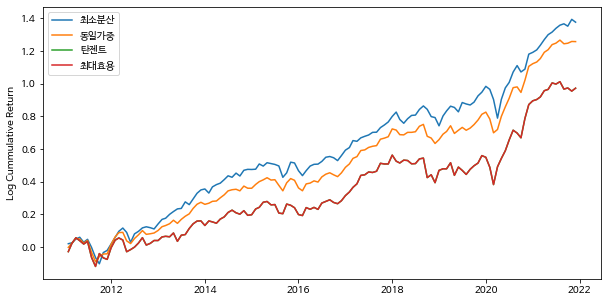

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

backProd = (back+1).cumprod()
plt.figure(figsize=(10, 5))
plt.ylabel("Log Cummulative Return")
for col in backProd.columns:

  plt.plot(np.log(backProd[col]), label=col)

plt.legend()

In [ ]:
 print("평균수익률")
print("----")
print(back.mean()*12)
print("변동성")
print("----")
print(back.std()*np.sqrt(12))
print("1month 99% VaR")
print("----")
print(-back.aggregate(np.percentile, 0, q=1))
print("샤프 비율")
print("----")
print((back.mean()-rf)*np.sqrt(12)/back.std())

평균수익률
----
최소분산    0.132914
동일가중    0.120486
탄젠트     0.097838
최대효용    0.097838
dtype: float64
변동성
----
최소분산    0.112166
동일가중    0.098336
탄젠트     0.130684
최대효용    0.130684
dtype: float64
1month 99% VaR
----
최소분산    0.065050
동일가중    0.070125
탄젠트     0.098109
최대효용    0.098109
dtype: float64
샤프 비율
----
최소분산    1.003098
동일가중    1.017797
탄젠트     0.592557
최대효용    0.592557
dtype: float64


In [ ]:
w